### Import Libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, MinMaxScaler

## Loading Dataset

### Diabetes clustering

In [1]:
# Importing the load_diabetes function from sklearn.datasets module
from sklearn.datasets import load_diabetes

# Loading the diabetes dataset and returning as a DataFrame using as_frame=True
df, _ = load_diabetes(return_X_y=True, as_frame=True)

# Selecting columns 'age', 'bmi', 'bp' from the DataFrame
df = df[['age', 'sex', 'bmi', 'bp']]

# Displaying the DataFrame
df

,age,sex,bmi,bp
0,0.038076,0.050680,0.061696,0.021872
1,-0.001882,-0.044642,-0.051474,-0.026328
2,0.085299,0.050680,0.044451,-0.005670
3,-0.089063,-0.044642,-0.011595,-0.036656
4,0.005383,-0.044642,-0.036385,0.021872
...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744
438,-0.005515,0.050680,-0.015906,-0.067642
439,0.041708,0.050680,-0.015906,0.017293
440,-0.045472,-0.044642,0.039062,0.001215


In [2]:
# Filtering rows where 'sex' column values are less than 0, assuming it represents gender
df = df.loc[df['sex'] < 0]

# Dropping the 'sex' column from the filtered DataFrame
df = df.drop(columns=['sex'])

# Displaying the resulting DataFrame
df


,age,bmi,bp
1,-0.001882,-0.051474,-0.026328
3,-0.089063,-0.011595,-0.036656
4,0.005383,-0.036385,0.021872
5,-0.092695,-0.040696,-0.019442
9,-0.070900,0.039062,-0.033213
...,...,...,...
434,0.016281,0.001339,0.008101
435,-0.012780,-0.023451,-0.040099
436,-0.056370,-0.074108,-0.050427
440,-0.045472,0.039062,0.001215


In [5]:
# Creating a copy of the DataFrame to scale the features
df_scaled = df.copy()

# Instantiating a StandardScaler object
scaler = StandardScaler()

# Fitting the scaler to the data
scaler.fit(df_scaled)

# Transforming and scaling the DataFrame using the fitted scaler, and converting it back to a DataFrame
df_scaled = pd.DataFrame(scaler.transform(df_scaled), columns=df_scaled.columns)

# Displaying the scaled DataFrame
df_scaled

,age,bmi,bp
0,0.123505,-0.966926,-0.320811
1,-1.709575,-0.155790,-0.533646
2,0.276262,-0.660010,0.672420
3,-1.785953,-0.747700,-0.178920
4,-1.327683,0.874571,-0.462701
...,...,...,...
230,0.505397,0.107281,0.388640
231,-0.105630,-0.396939,-0.604591
232,-1.022170,-1.427300,-0.817426
233,-0.793035,0.874571,0.246750


### NFL Clustering

In [ ]:
# Importing the load_nfl function from yellowbrick.datasets module
from yellowbrick.datasets import load_nfl

# Loading the NFL dataset
X, y =

# Specify the features to use for clustering: ['Rec', 'Yds', 'TD', 'Fmb', 'Ctch_Rate']
features =

# Selecting features and filtering only players with over 20 targets
X = X.query('Tgt >= 20')[features]

# Displaying the subset of the NFL dataset with selected features
X


In [ ]:
# Creating a copy of the feature DataFrame i.e. X to scale the features
df_nfl_scaled =

# Instantiating a StandardScaler object
scaler_nfl =

# Fitting the scaler to the data
# code here

# Transforming and scaling the DataFrame using the fitted scaler, and converting it back to a DataFrame
df_nfl_scaled =


## K-means clustering

### Diabetes clustering

**How many clusters should we use?**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

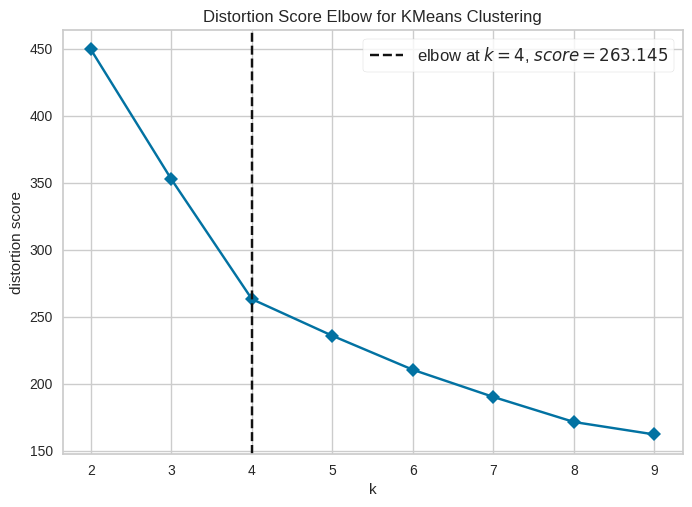

KElbowVisualizer(ax=<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>,
                 estimator=KMeans(n_clusters=9, random_state=54), k=(2, 10),
                 timings=False)

In [6]:
# Importing the kelbow_visualizer from yellowbrick.cluster.elbow module
from yellowbrick.cluster.elbow import kelbow_visualizer

# Using the elbow method to determine the optimal number of clusters
# Creating a KelbowVisualizer with KMeans clustering algorithm, specifying a range of k values from 2 to 10
# Using the 'distortion' metric to evaluate cluster quality
# Disabling timings for faster execution
kelbow_visualizer(KMeans(random_state=54), df_scaled, k=(2, 10),
                  metric='distortion',
                  timings=False)


**How to perform Clustering?**

In [7]:
# Instantiating KMeans clustering with 3 clusters and a fixed random state
kmeans = KMeans(n_clusters=4, random_state=54, n_init=10)

# Fitting KMeans to the scaled DataFrame
kmeans.fit(df_scaled)

# Assigning cluster labels to the original DataFrame subset 'df_gender_1'
df['clusters'] = kmeans.labels_

# Converting cluster labels to categorical data type for better visualization with seaborn
df['clusters'] = df['clusters'].astype('category')  # Makes seaborn use qualitative color palette

# Display types
df.dtypes

age          float64
bmi          float64
bp           float64
clusters    category
dtype: object

In [8]:
# Transforming cluster centers from scaled space back to the original feature space using the scaler's inverse_transform method
centers = pd.DataFrame(scaler.inverse_transform(kmeans.cluster_centers_), columns=df_scaled.columns)

# Creating a DataFrame to hold cluster centers in the scaled space directly
centers_scaled = pd.DataFrame(kmeans.cluster_centers_, columns=df_scaled.columns)

# Displaying the cluster centers in the original feature space
print("Cluster centers in the original feature space:")
print(centers)

# Displaying the cluster centers in the scaled feature space
print("\nCluster centers in the scaled feature space:")
print(centers_scaled)


Cluster centers in the original feature space:
        age       bmi        bp
0  0.023596 -0.025128 -0.019362
1 -0.027227  0.051041 -0.029928
2  0.027521  0.033002  0.059506
3 -0.057306 -0.047130 -0.045020

Cluster centers in the scaled feature space:
        age       bmi        bp
0  0.659215 -0.431041 -0.177275
1 -0.409407  1.118211 -0.394997
2  0.741738  0.751308  1.447917
3 -1.041843 -0.878571 -0.705999


**How to view clusters?**

<Axes: xlabel='age', ylabel='bmi'>

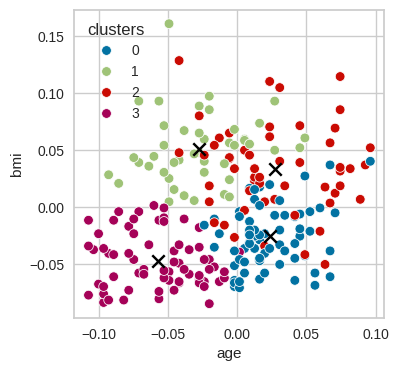

In [9]:
# Creating a new figure and axis object for plotting
fig, ax = plt.subplots(figsize=(4, 4))

# Generating a scatter plot of 'age' versus 'bmi' with cluster labels encoded by hue
ax = sns.scatterplot(x='age', y='bmi', hue='clusters', ax=ax, data=df)

# Adding cluster centers as 'x' markers on the scatter plot
centers.plot.scatter(x='age', y='bmi', ax=ax, marker='x', s=80, color='black')

### NFL Clustering

**How many clusters should we use?**

In [ ]:
# Importing KMeans clustering algorithm from sklearn.cluster module
from sklearn.cluster import KMeans

# Importing the kelbow_visualizer from yellowbrick.cluster.elbow module
from yellowbrick.cluster.elbow import kelbow_visualizer

# Using the elbow method to determine the optimal number of clusters
# Creating a KelbowVisualizer with KMeans clustering algorithm, specifying a range of k values from 2 to 10
# Using the 'distortion' metric to evaluate cluster quality
# Disabling timings for faster execution
# code here


**How to perform Clustering?**

In [ ]:
# Instantiating KMeans clustering with 5 clusters and a fixed random state of 54
kmeans_nfl =

# Fitting KMeans to the scaled feature DataFrame
# code here

# Assigning cluster labels to the original feature DataFrame
X['clusters'] =

# Converting cluster labels to categorical data type for better visualization with seaborn
X['clusters'] =


In [ ]:
# Transforming cluster centers from scaled feature space back to the original feature space using the scaler's inverse_transform method
centers_nfl =

# Creating a DataFrame to hold cluster centers in the scaled feature space directly
centers_scaled_nfl =

# Displaying the cluster centers in the original feature space
print(centers_nfl)

# Displaying the cluster centers in the scaled feature space
print(centers_scaled_nfl)


**How to view clusters?**

In [ ]:
# Plotting the clusters with their cluster centers
# code here


## Results

### Diabetes clustering

Counter({0: 72, 3: 66, 2: 53, 1: 44})


Text(0.5, 1.0, 'Cluster size distribution')

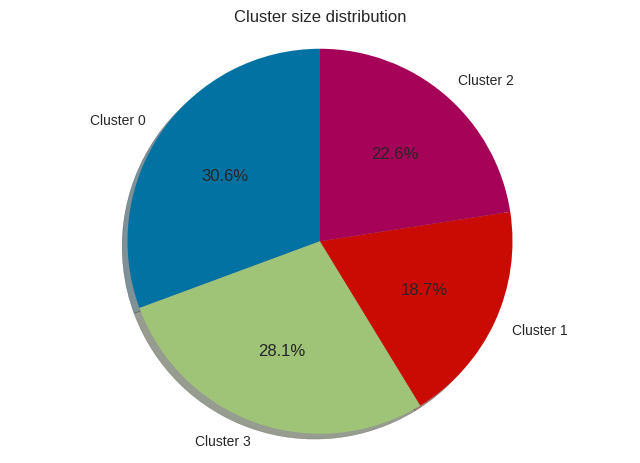

In [10]:
# Importing Counter from collections module to count occurrences of each cluster label
from collections import Counter

# Counting occurrences of each cluster label using Counter
counts = Counter(kmeans.labels_)

# Printing the counts of occurrences for each cluster
print(counts)

# Creating a new figure and axis object for plotting
fig1, ax1 = plt.subplots()

# Generating a pie chart to visualize the distribution of cluster sizes
ax1.pie(counts.values(), labels=[f'Cluster {i}' for i in counts.keys()], autopct='%1.1f%%',
        shadow=True, startangle=90)

# Ensuring equal aspect ratio to draw the pie chart as a circle
ax1.axis('equal')

# Adding a title to the pie chart
ax1.set_title('Cluster size distribution')


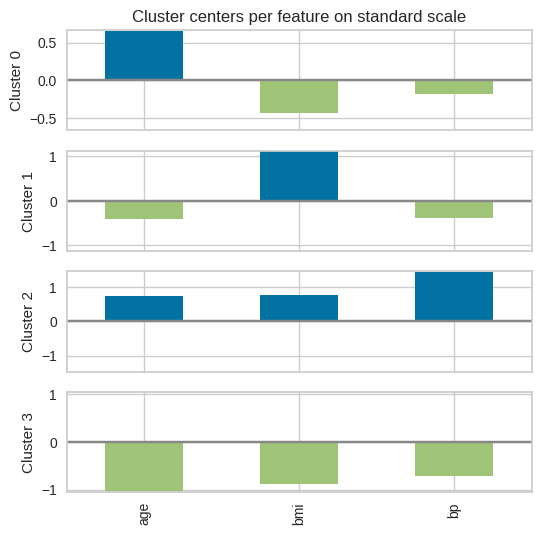

In [17]:
# Creating subplots with a row for each cluster and one column, sharing the x-axis
f, axes = plt.subplots(kmeans.n_clusters, 1, figsize=(6, 6), sharex=True)

# Iterating over each subplot and corresponding cluster center
for i, ax in enumerate(axes):
    # Extracting the center values for the current cluster
    center = centers_scaled.loc[i, :]

    # Calculating the maximum value to set y-axis limits
    maxPC = 1.01 * np.max(np.max(np.abs(center)))

    # Assigning colors for positive and negative values in the center
    colors = ['C0' if l > 0 else 'C1' for l in center]

    # Adding a horizontal line for better visualization
    ax.axhline(color='#888888')

    # Plotting the bar chart of cluster center values with specified colors
    center.plot.bar(ax=ax, color=colors)

    # Setting y-axis label for each subplot
    ax.set_ylabel(f'Cluster {i}')

    # Setting y-axis limits for better visualization
    ax.set_ylim(-maxPC, maxPC)

    # Adding a title to the first subplot
    if i == 0:
        ax.set_title('Cluster centers per feature on standard scale')


**Note:** Typically, it is adviced to back transform the centers to original scale. It seems to me that leaving them on the standard scales helps interpretation.

For example, in the plot above, _Cluster 0_ contains patients with age well above average -> older individuals who have high bmi and high bp; _Cluster 1_ on the other hand has patients with age well below the average -> young individuals who have low bmi and low bp. Finally, _Cluster 2_ has average age patients with high bmi and low bp.

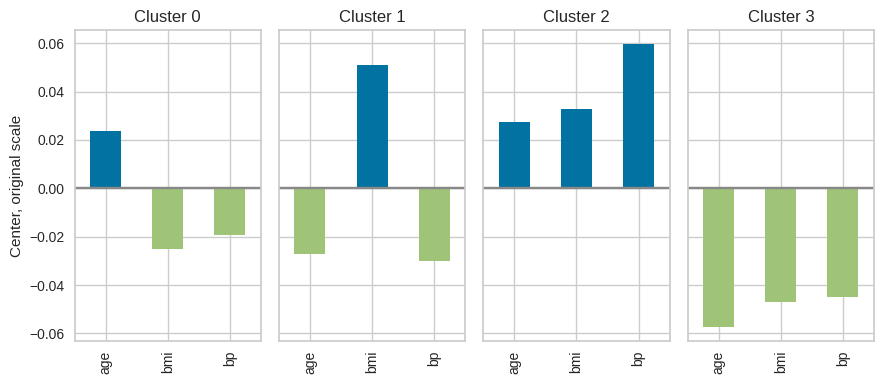

In [18]:
# Creating subplots with one row and a column for each cluster, sharing the y-axis
f, axes = plt.subplots(1, kmeans.n_clusters, figsize=(9, 4), sharey=True)

# Finding the maximum value among all cluster centers
overall_max = centers.max().max()

# Iterating over each subplot and corresponding cluster center
for i, ax in enumerate(axes):
    # Extracting the center values for the current cluster
    center = centers.loc[i, :]

    # Assigning colors for positive and negative values in the center
    colors = ['C0' if l > 0 else 'C1' for l in center]

    # Adding a horizontal line for better visualization
    ax.axhline(color='#888888')

    # Plotting the bar chart of cluster center values with specified colors
    center.plot.bar(ax=ax, color=colors)

    # Setting title for each subplot
    ax.set_title(f'Cluster {i}')

    # Setting y-axis label for the first subplot
    if i == 0:
        ax.set_ylabel('Center, original scale')

# Adjusting the layout of subplots for better appearance
plt.tight_layout()


### NFL Clustering

In [ ]:
# Plotting a pie chart showing the distribution of data samples for each cluster
# code here


In [ ]:
# Plotting the cluster centers for each feature on the standard scale
# code here



## Optional: More ways to check Number of Clusters

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

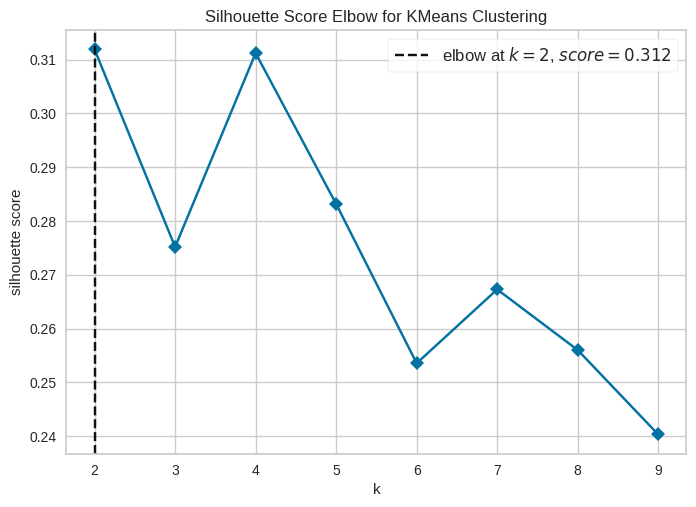

KElbowVisualizer(ax=<Axes: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>,
                 estimator=KMeans(n_clusters=9, random_state=54), k=(2, 10),
                 metric='silhouette', timings=False)

In [11]:
kelbow_visualizer(KMeans(random_state=54), df_scaled, k=(2,10),
                  metric='silhouette',
                 timings=False)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

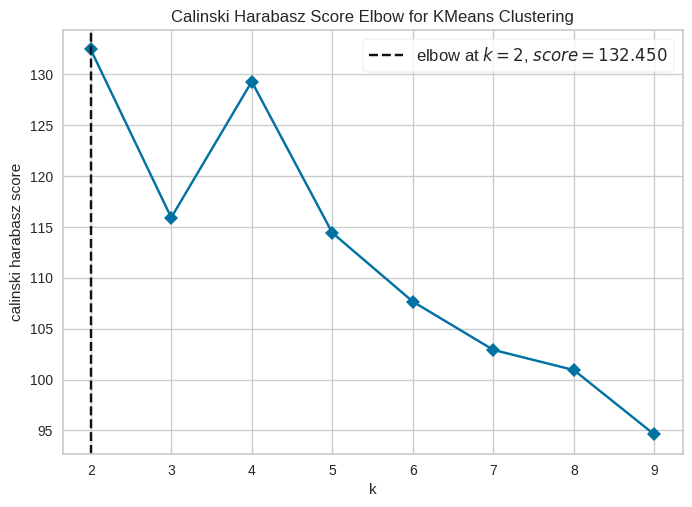

KElbowVisualizer(ax=<Axes: title={'center': 'Calinski Harabasz Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='calinski harabasz score'>,
                 estimator=KMeans(n_clusters=9, random_state=54), k=(2, 10),
                 metric='calinski_harabasz', timings=False)

In [12]:
kelbow_visualizer(KMeans(random_state=54), df_scaled, k=(2,10),
                  metric='calinski_harabasz',
                 timings=False)